In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('penghasilan.csv')
df.head(10)

,JumlahAnggota,Penghasilan
0,4,5
1,4,8
2,4,3
3,4,1
4,1,3
5,1,4
6,1,7
7,1,5
8,2,6
9,2,2


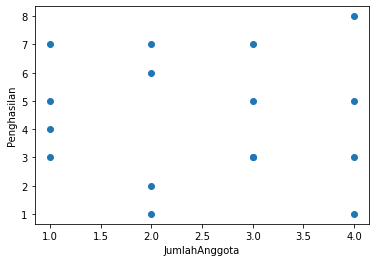

In [6]:
plt.scatter(df['JumlahAnggota'], df['Penghasilan'])
plt.xlabel('JumlahAnggota')
plt.ylabel('Penghasilan')
plt.show()

In [10]:
scaler = StandardScaler()
scaler.fit(df)
df_Scaler = scaler.transform(df)
df_Scaler

array([[ 1.34164079,  0.29111125],
       [ 1.34164079,  1.68844528],
       [ 1.34164079, -0.64044476],
       [ 1.34164079, -1.57200078],
       [-1.34164079, -0.64044476],
       [-1.34164079, -0.17466675],
       [-1.34164079,  1.22266727],
       [-1.34164079,  0.29111125],
       [-0.4472136 ,  0.75688926],
       [-0.4472136 , -1.10622277],
       [-0.4472136 , -1.57200078],
       [-0.4472136 ,  1.22266727],
       [ 0.4472136 , -0.64044476],
       [ 0.4472136 ,  0.29111125],
       [ 0.4472136 ,  1.22266727],
       [ 0.4472136 , -0.64044476]])

In [15]:
# convert data to dataframe
df_scaler1 = pd.DataFrame(df_Scaler, columns=['JumlahAnggota', 'Penghasilan'])
df_scaler1

,JumlahAnggota,Penghasilan
0,1.341641,0.291111
1,1.341641,1.688445
2,1.341641,-0.640445
3,1.341641,-1.572001
4,-1.341641,-0.640445
5,-1.341641,-0.174667
6,-1.341641,1.222667
7,-1.341641,0.291111
8,-0.447214,0.756889
9,-0.447214,-1.106223


In [17]:
kmeans = KMeans(n_clusters = 3)
y_predict = kmeans.fit_predict(df_scaler1[['JumlahAnggota', 'Penghasilan']])
y_predict

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2], dtype=int32)

In [18]:
df['HasilPrediksi'] = y_predict

In [19]:
df

,JumlahAnggota,Penghasilan,HasilPrediksi
0,4,5,0
1,4,8,0
2,4,3,2
3,4,1,2
4,1,3,1
5,1,4,1
6,1,7,1
7,1,5,1
8,2,6,1
9,2,2,2


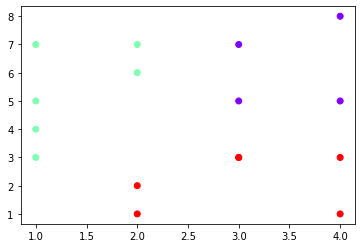

In [20]:
plt.scatter(df['JumlahAnggota'],df['Penghasilan'],c=df['HasilPrediksi'],cmap='rainbow')
plt.show()

Text(0, 0.5, 'WCSS')

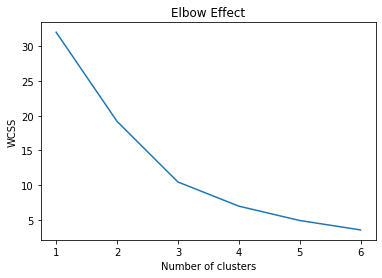

In [23]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(df_scaler1[['JumlahAnggota', 'Penghasilan']])
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('Elbow Effect')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')